#The Little Book of Deep Learning by François Fleuret

https://fleuret.org/public/lbdl.pdf

These following series of notebooks will consist of my personal code and explanations as I work thorugh the textbook mentioned above.

# Learning From Data

* $ \text{Training Data} =  D = \text{Set} \{(x_i, y_i)\}_{i=1}^N$

* $F$ is the parametric model

* $w$ is the trainable parameter, also called weights.

* $\hat{y} = F(x,w)$ where $\hat{y}$ is the predicted value

* $w \to w^*$ is the process by which we tune or train the paramter $w$ to achieve better outcome predictions

* $Λ(w)$ is the Loss function by which we essentially assess when our parametric model, $F$, is good enough or not. The smaller the valus of $Λ(w)$, the better our model $F$.

# Basis Function Regression

Suppose we have that our paramteric model is a very basic linear combination of some pre-defined basis of functions say; $(f_1,...,f_K)$ and respectively with weights $(w_1,...,w_K)$. Defined as:
$$
F(x,w) = \sum_{i=1}^{K} w_i \cdot f_i
$$

Most common loss function is the ***Mean Squared Error***. Defined as:
$$
Λ(w) = \frac{1}{N}\sum_{i=1}^{N} (y_i - F(x_i, w))^2
$$

Now observe that since our paramteric model $F$ is linear with respect to $w_i$'s and on the other hand the loss function $Λ$ is quadratic with respect to $F$, thus $Λ$ is also quadratic with respect to $w_i$'s as well, hence trying to minimize the loss function or find better weights $w^*$, it simplifies to solving a linear system.

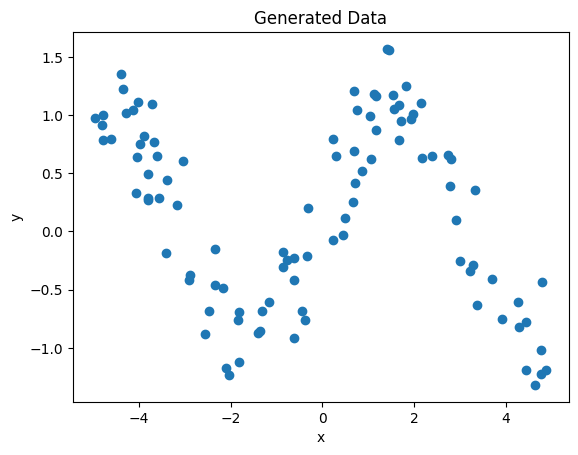

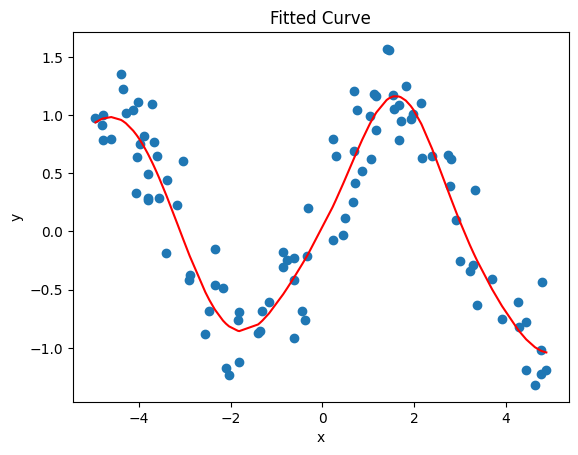

In [1]:
#Below we try to implement the above discussion in some rudimentry code
import numpy as np
import matplotlib.pyplot as plt

# Set the seed for reproducibility
np.random.seed(0)

# Number of data points
N = 100

# Generate some random data
x = np.random.uniform(-5, 5, N)
y = np.sin(x) + np.random.normal(0, 0.3, N)

# Plot the data
plt.scatter(x, y)
plt.title("Generated Data")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# Define the number of basis functions to use
num_basis_functions = 10

# Define the mean and standard deviation of the Gaussian basis functions
means = np.linspace(-5, 5, num_basis_functions)
std_dev = 1.0

# Define the Gaussian basis functions
def gaussian_basis(x, mu, sigma):
    return np.exp(-(x - mu)**2 / (2 * sigma**2))

# Calculate the design matrix
X = np.empty((N, num_basis_functions))
for i in range(num_basis_functions):
    X[:, i] = gaussian_basis(x, means[i], std_dev)

# Calculate the weights using the normal equation
weights = np.linalg.inv(X.T @ X) @ X.T @ y

# Calculate the predictions
y_pred = X @ weights

# Plot the data and the fitted curve
plt.scatter(x, y)
plt.plot(np.sort(x), y_pred[np.argsort(x)], color='red')
plt.title("Fitted Curve")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


# Under and Overfitting



*   Capacity of a Model: That is the flexibility of the model and its inherent ability to fit diverse data.



*   Underfitting: occurs when a model fails to capture the underlying pattern of the data. The model is too simple to understand the data properly, resulting in a poor performance on both the training data and unseen data. Underfitting typically happens when the model is too simple, such as linear models on non-linearly separable data. Adding more features, increasing model complexity, or obtaining more training data can help address underfitting.



* Overfitting: occurs when a model learns the training data too well. It's as if the model memorizes the training data, including the noise and outliers. Consequently, while the model may perform well on the training data (low training error), it performs poorly on new, unseen data (high testing error). This is because it has not generalized well from the training data; it's too focused on the specifics of that data. Overfitting typically happens when the model is too complex, such as having too many parameters relative to the number of observations. Techniques like regularization, early stopping, pruning, and dropout are commonly used to prevent overfitting.


In summary, practitioners are attempting to find a balance between overfitting and underfitting for their specific model and challenge. This is often referred to as the bias-variance tradeoff, where bias is error from erroneous assumptions (underfitting), and variance is error from sensitivity to small fluctuations in the training set (overfitting). A good model has low bias and low variance, balancing complexity and simplicity.


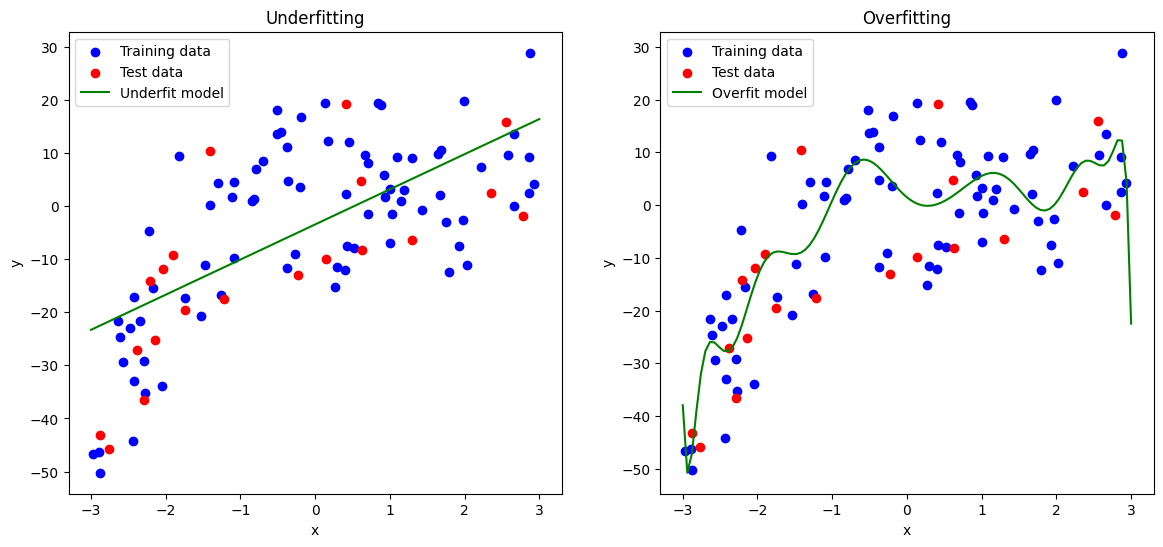

In [2]:
# Now lets demostrate the two different concepts
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Set the seed for reproducibility
np.random.seed(0)

# Generate some more complex data
x = np.random.uniform(-3, 3, 100)
y = x**3 - 2*x**2 + x + np.random.normal(0, 10, 100)

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Fit a linear regression model (underfitting)
model_underfit = LinearRegression()
model_underfit.fit(x_train.reshape(-1, 1), y_train)

# Fit a high-degree polynomial regression model (overfitting)
model_overfit = make_pipeline(PolynomialFeatures(15), LinearRegression())
model_overfit.fit(x_train.reshape(-1, 1), y_train)

# Predict with the models
x_range = np.linspace(-3, 3, 100).reshape(-1, 1)
y_pred_underfit = model_underfit.predict(x_range)
y_pred_overfit = model_overfit.predict(x_range)

# Plot the data and the models
plt.figure(figsize=(14, 6))


# we can see that a simple linear model (green line) does not capture the complexity of the data well,
# leading to poor performance on both the training data (blue points)
# and the test data (red points).
plt.subplot(1, 2, 1)
plt.scatter(x_train, y_train, color='blue', label='Training data')
plt.scatter(x_test, y_test, color='red', label='Test data')
plt.plot(x_range, y_pred_underfit, color='green', label='Underfit model')
plt.title("Underfitting")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()


# we can see that a high-degree polynomial model (green line) fits the training data (blue points) really,
# but it also captures the noise in the training data. As a result, it doesn't generalize well to the test data (red points) and
# it leads to a poor prediction for the test data.
plt.subplot(1, 2, 2)
plt.scatter(x_train, y_train, color='blue', label='Training data')
plt.scatter(x_test, y_test, color='red', label='Test data')
plt.plot(x_range, y_pred_overfit, color='green', label='Overfit model')
plt.title("Overfitting")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

plt.show()


# Categories of models